In [47]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# Might be worth trying to download packages such as Scipy but we will see later on!

x = np.array([1,2,3,4,5])
r = np.random.randn(4,4)
print(Qobj(x))
print(Qobj(r))
#The dimensions, shape and input data can all be easily changed depending on what we want to do.

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.14631112 -0.76514195 -0.13988971 -0.00419365]
 [-1.37979508 -0.4737394  -0.91631985  0.24627995]
 [-2.39798273  0.14360038 -1.82996855 -0.61366529]
 [-0.93259328 -1.87398818  0.54758653 -0.15201838]]


In [ ]:
n=fock(4,1) # Provides basis vectors in Fock Space
destroy(3) # Lowering operator 
coherent(5,2).dag() #find hermitian conjugate 
coherent(5,2).tr() # finds trace of matrix / vector

#Clearly we can create quantum objects in different basis states. We also have the ability 
# to easily manipulate them using inbuilt operators!



In [ ]:
vac = fock(5,0) # vaccum state vector within hilbert with number states [0,1,2,3,4]
a = destroy(5) # This is the annhilation operator for 5 number states
a*vac # we find what we would expect of the annhilation operator acting on the ground state!

# Lets see what happens when we apply this to a different number state

num= fock(5,3)
a*num # This returns us a lowered basis vector multiped by sqrt(3)

c = create(5) # creation operator for 5 number states ranging from 0 -> 4 

# Again lets see what happens when we apply this to the vaccum state and the 3rd number state!
print(c*vac)
print(c*num)

#We get exactly what we expect, number state raised by one step and multiplied by a constant
#It's also possible to use them multiple times e.g

print(c**3 * vac) # Clearly has been raised 3 times and multipled by sqrt(6) ( sqrt(2 * 3) )
# This is going to be SUPER useful for when we want to investigate the quantum self sustained oscillators 
#Their master equations are powers of these creation and annihilation operators, nice to see how user friendly it is 
#to interact with these things.

# We can produce superpositions of state 
ket =( fock(5,0) + fock(5,3)).unit()
print(ket)


In [ ]:
# In our project we're interested in non-equilliberium dynamics and so the master equation using density operators is important
# we can construct density operators.

ket = fock(5,2) 
print(ket*ket.dag())
# ket2dm takes a bra or ket and transforms it into a density matrix.
# This is the inbuilt function way to do what we saw above |n><n|
print(ket2dm(ket))


In [ ]:
#Expectation value
vac = fock(5,0)
one = fock(5,1)
two = fock(5,2)
x =( vac + one + two).unit()
x2 = 0.5*ket2dm(vac) + 0.3*ket2dm(one) + 0.2*(ket2dm(two))

c = create(5)
n = num(5)
np.testing.assert_almost_equal(expect(n,vac),0) # Raises an error if the two are not equal to a desired amount.
np.testing.assert_almost_equal(expect(n,one),1)
#As the code runs smoothly we can see that the expectation value of an operator in a given state is what we want
#i.e <N>|1 = 1

(ket2dm(vac)**2).tr()
(ket2dm(x)**2).tr()
n_th_a

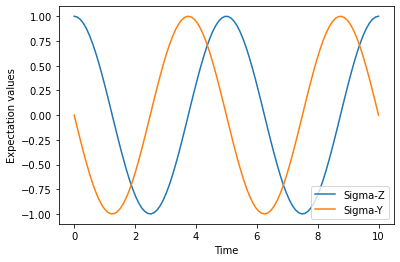

In [3]:
# Produce the harmonic oscillator and its time evolution.
# Visualise it with the Wigner function and phase distribution too.
H = 2*np.pi * 0.1 * sigmax()
psi0 = basis(2, 0)
times = np.linspace(0.0, 10.0, 100)
result = sesolve(H, psi0, times, [sigmaz(), sigmay()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-Z", "Sigma-Y"))
plt.show()

#Collapse operators are an empty list when we consider unitary evolution, this changes when we include a heat bath.




In [ ]:
#Oscillator in a Heat Bath
N = 10 # No. number states we want to investigate 
a = destroy(N)
H = a.dag() * a # Hamiltonian of harmonic oscillator where h-bar and omega are set = 1
psi0 = fock(N, 10) # Our initial condition of the 10th number state
kappa = 0.1 # This term will be the coupling to oscillator
t = np.linspace(0,50,100)

#When we want to investigate the behaviour of oscillators coupled to a heat bath we need to consider collapse operators.

collapse = []
mesolve(H,psi0,t,collapse,a.dag()*a)
# mesolve takes the Hamiltonian, initial state, times , collapose operators and the operator you want to investigate 
# Here a.dag()*a which is the number operator is chosen and when we use .expect() we'll be able to see what states we're in.


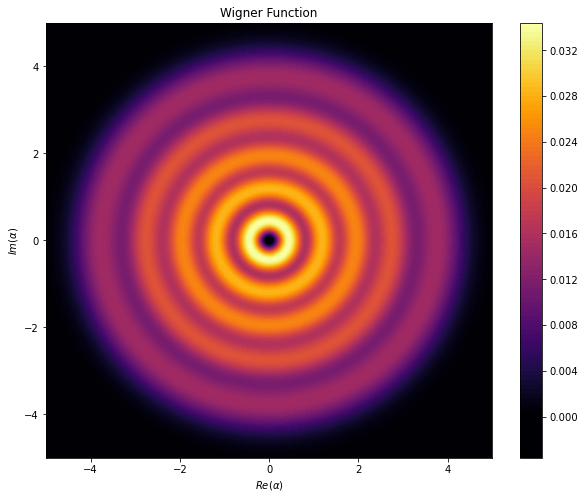

In [73]:
#Vdp Oscillator without a heat bath:

N = 10
psi0 = basis(N,0)
a = destroy(N)
H = num(N) # Hamiltonian is just the number operator with no heat bath
# We want to create collapse operators so that mesolve can do the heavy lifting
k1 = 1  # rate at which the coupling occurs 
k2 = 0.05 * k1
c1 = np.sqrt(2*k1) * a.dag() # square root of rate * how the coupling happens
c2 = np.sqrt(2*k2) * (a**2)
t = np.linspace(0,10,100)
Collapse = [c1 , c2]

results = mesolve(H,psi0,t,Collapse)


x = np.linspace(-5,5,200)

W = wigner(results.states[10],x,x)
wmap = wigner_cmap(W)                                             #Generate Wigner colormap   
nrm = mpl.colors.Normalize(0, W.max())                             #Normalise colours of Wigner function

fig, axes = plt.subplots(1, 1, figsize=(10,8))
contour = axes.contourf(x, x, W, 100, cmap=cm.inferno, norm = nrm)       #Plot the Wigner function
cb = fig.colorbar(contour, ax=axes)                                                 #Show a colourbar
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $')
plt.show()
#clearly see circular symmetry at different amplitudes of alpha, ask andrew about this.



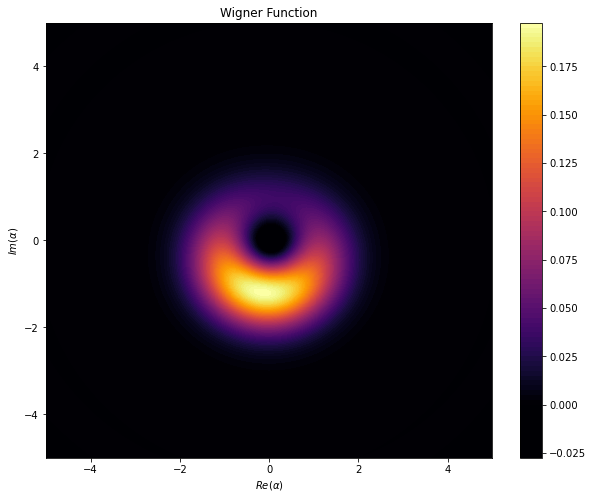

In [87]:
#Vdp Oscillator with a heat bath:

N = 20
psi0 = basis(N,0)
a = destroy(N)
E = 20 # drive strength.... what units are we talking about is something to be concrete on!
D = 0 # detuning 

H = a.dag() * a + (E/2)*(a + a.dag())


k1 = 1  # rate at which the coupling occurs 
k2 = 20 * k1
c1 = np.sqrt(2*k1) * a.dag() # square root of rate * how the coupling happens
c2 = np.sqrt(2*k2) * (a**2)
t = np.linspace(0,10,1000) # Sometimes we need to increase the number of timesteps s.t the ODE's are sufficiently continuous.
Collapse = [c1 , c2] #list of collapse operators.

results = mesolve(H,psi0,t,Collapse)


x = np.linspace(-5,5,200)

W = wigner(results.states[20],x,x)
wmap = wigner_cmap(W)                                             #Generate Wigner colormap   
nrm = mpl.colors.Normalize(0, W.max())                             #Normalise colours of Wigner function

fig, axes = plt.subplots(1, 1, figsize=(10,8))
contour = axes.contourf(x, x, W, 100, cmap=cm.inferno, norm = nrm)       #Plot the Wigner function
cb = fig.colorbar(contour, ax=axes)                                                 #Show a colourbar
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $')
plt.show()
# Here we see similar results to that of Sadeghpour, that being the radial symmetry is broken in the quantum limit
# when k2 --> infinity we see the quantum behaviour and that the symmetry is lost as the phase is pulled by the drive
